# Assignment 2: Naive Bayes [20 marks]

Student Name: Yixin SHEN

Student ID: 1336242

## General info

<b>Due date</b>: Friday, 2 September 2022, 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2.0;</li>
    <li>two days late, -4.0;</li>
    <li>three days late, -6.0;</li>
    <li>four days late, -8.0;</li>
    <li>five days late, -10.0;</li>
</ul>

<b>Marks</b>: 20% of mark for class. 

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/126693/pages/python-and-jupyter-notebooks?module_item_id=3950453) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer.If your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should implement functions for the skeletons listed below. You may implement any number of additional (helper) functions. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficiency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 4 marks for unreadable or excessively inefficient code.

7 of the marks available for this Project will be assigned to whether the five specified Python functions work in a manner consistent with the materials from COMP90049. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

13 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A2); we recommend you check it regularly.

<b>Academic misconduct</b>: While you may discuss this homework in general terms with other students, it ultimately is still an individual task. Reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/126693/modules#module_734188">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -10.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -5.0
</UL>

## Part 1: Base code [7 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the features as nominal and use them as provided (e.g., do **not** convert them to other feature types, such as numeric ones). Implement a Naive Bayes classifier with appropriate likelihood function for the data.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms. You must use epsilon smoothing strategy as discussed in the Naive Bayes lecture. 
4. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation.
5. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)*
6. Please place the jupyter notebook into the same folder as the input data.


In [1]:
# This function should open a csv file and read the data into a useable format [0.5 mark]
import pandas as pd
def preprocess(filename):
    pd_reader = pd.read_csv(filename)

    # drop the id column
    pd_reader = pd_reader.drop(['ID'], axis=1)
    
    # convert the label column to label list
    ground_truth = pd_reader['label'].tolist()
    
    return pd_reader, ground_truth
    

In [2]:
# This function should build a supervised NB model [3 marks]
def train(train_df):
    feature_list = train_df.columns.tolist()[:-1]
    label_list = train_df['label'].unique()
    
    prior_class_prob = {}
    
    # calculate the prior class probability
    rows_num = len(train_df)
    for label in label_list:
        subset = train_df[train_df['label']==label]
        prior_class_prob[label] = len(subset)/rows_num
    
    # Epsilon used for epsilon smoothing, which is much smaller than 1/N (N =the number of training instances)
    # Given that the maximum N in the three datasets is 4521, I set epsilon here to 0.0000000001
    epsilon = 0.0000000001
    
    feature_dic = {}
    for feature in feature_list:
        
        # get the value list in this feature
        value_list = train_df[feature].unique()
        label_dic = {}
        
        # get label dic and value dic
        for label in label_list:
            subset = train_df[train_df['label']==label]
            label_sum =  len(subset)
            value_dic = {}
            for value in value_list:
                value_count = len(subset[subset[feature]==value])
                
                # epsilon smoothing for instruction 3
                if value_count == 0:
                    value_dic[value] = epsilon
                else:
                    value_dic[value] = value_count/label_sum
                
            label_dic[label] = value_dic
        feature_dic[feature] = label_dic
    return feature_dic, prior_class_prob
    

In [3]:
# This function should predict the class for a set of instances, based on a trained model [1.5 marks]
def predict(test_df, feature_dic, prior_class_prob):
    import math
    
    feature_list = test_df.columns.tolist()[:-1]
    label_list = test_df['label'].unique()
    
    instance_class_prop = []
    prediction = []
    
    epsilon = 0.0000000001
    
    for index, row in test_df.iterrows():
        class_prob = {}
        for label in label_list:
            # initial the prob with the prior class probability
            prob = math.log(prior_class_prob[label])
            
            for feature in feature_list:
                
                # implement log probabilities to avoid numerical instability 
                try:
                    feature_dic[feature][label][row[feature]]
                except KeyError:
                    # epsilon smoothing for instruction 3
                    prob = prob + math.log(epsilon)
                else:
                    prob = prob + math.log(feature_dic[feature][label][row[feature]])
            
            # set the class probability
            class_prob[label] = prob
        
        # get the prediction
        result = max(class_prob, key=class_prob.get)
        instance_class_prop.append(class_prob)
        prediction.append(result)

    return instance_class_prop, prediction
        
    
    

In [4]:
# This function should evaluate a set of predictions [1 mark]
def evaluate(ground_truth, prediction):
    from sklearn import metrics
    accuracy = metrics.accuracy_score(ground_truth, prediction)
    
    # Note that, there is no need to emphasizes small classes or large classes for all the three datasets.
    # Therefore, I implement weighted precision, recall and f1 score here for all the three datasets.
    precision_weighted = metrics.precision_score(ground_truth, prediction, average = 'weighted', zero_division=1)
    
    recall_weighted = metrics.recall_score(ground_truth, prediction, average = 'weighted')
    
    f1_weighted = metrics.f1_score(ground_truth, prediction, average = 'weighted')
    
    
    return accuracy, precision_weighted, recall_weighted, f1_weighted



## Bank Marketing

In [5]:
# This cell should act as your "main" function where you call the above functions 
# on the full Bank Marketing data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the Bank Marketing data

df, ground_truth = preprocess("./bank-marketing.csv")

feature_dic, prior_class_prob = train(df)

instance_class_prop, prediction = predict(df, feature_dic, prior_class_prob)

# Second, print the full evaluation results from the evaluate() function
accuracy, precision_weighted, recall_weighted, f1_weighted = evaluate(ground_truth, prediction)

print('accuracy = ', accuracy)
print('precision_weighted = ', precision_weighted)
print('recall_weighted = ', recall_weighted)
print('f1_weighted = ', f1_weighted)
print('\n')


# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized

# get the feature vectors of instances [0, 1, 2]
feature_vecs = []
for i in range(0, 3):
    order1 = df.iloc[i].tolist()[:-1]
    feature_vecs.append(order1)

feature_list = df.columns.tolist()[:-1]
label_list = df['label'].unique()


print("Feature vectors of instances [0, 1, 2]: ", feature_vecs)

print("\nNumber of instances (N): ", len(df))
print("Number of features (F): ", len(feature_list))
print("Number of labels (L): ", len(label_list))

print("\n\nPredicted class probabilities for instance N-3: ", instance_class_prop[-3])
print("Predicted class for instance N-3: ", prediction[-3])
print("\nPredicted class probabilities for instance N-2: ", instance_class_prop[-2])
print("Predicted class for instance N-2: ", prediction[-2])
print("\nPredicted class probabilities for instance N-1: ", instance_class_prop[-1])
print("Predicted class for instance N-1: ", prediction[-1])



accuracy =  0.8874142888741429
precision_weighted =  0.863625824689692
recall_weighted =  0.8874142888741429
f1_weighted =  0.8685382875679952


Feature vectors of instances [0, 1, 2]:  [['unemployed', 'married', 'primary', 'no', 'no', 'no', 'cellular', 'oct', 'unknown'], ['services', 'married', 'secondary', 'no', 'yes', 'yes', 'cellular', 'may', 'failure'], ['management', 'single', 'tertiary', 'no', 'yes', 'no', 'cellular', 'apr', 'failure']]

Number of instances (N):  4521
Number of features (F):  9
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'no': -6.711607763537066, 'yes': -8.58311083143239}
Predicted class for instance N-3:  no

Predicted class probabilities for instance N-2:  {'no': -10.619918711707392, 'yes': -11.68220339799834}
Predicted class for instance N-2:  no

Predicted class probabilities for instance N-1:  {'no': -14.88701380580801, 'yes': -16.28697922108946}
Predicted class for instance N-1:  no


## Student

In [6]:
# This cell should act as your "main" function where you call the above functions 
# on the full Student data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the Student data

df, ground_truth = preprocess("./student.csv")

feature_dic, prior_class_prob = train(df)

instance_class_prop, prediction = predict(df, feature_dic, prior_class_prob)


# Second, print the full evaluation results from the evaluate() function

accuracy, precision_weighted, recall_weighted, f1_weighted = evaluate(ground_truth, prediction)

print('accuracy = ', accuracy)
print('precision_weighted = ', precision_weighted)
print('recall_weighted = ', recall_weighted)
print('f1_weighted = ', f1_weighted)
print('\n')



# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized

# get the feature vectors of instances [0, 1, 2]
feature_vecs = []
for i in range(0, 3):
    order1 = df.iloc[i].tolist()[:-1]
    feature_vecs.append(order1)

feature_list = df.columns.tolist()[:-1]
label_list = df['label'].unique()


print("Feature vectors of instances [0, 1, 2]: ", feature_vecs)

print("\nNumber of instances (N): ", len(df))
print("Number of features (F): ", len(feature_list))
print("Number of labels (L): ", len(label_list))

print("\n\nPredicted class probabilities for instance N-3: ", instance_class_prop[-3])
print("Predicted class for instance N-3: ", prediction[-3])
print("\nPredicted class probabilities for instance N-2: ", instance_class_prop[-2])
print("Predicted class for instance N-2: ", prediction[-2])
print("\nPredicted class probabilities for instance N-1: ", instance_class_prop[-1])
print("Predicted class for instance N-1: ", prediction[-1])



accuracy =  0.48382126348228044
precision_weighted =  0.4857742081328605
recall_weighted =  0.48382126348228044
f1_weighted =  0.4834963990558278


Feature vectors of instances [0, 1, 2]:  [['GP', 'F', 'U', 'GT3', 'A', 'high', 'high', 'at_home', 'teacher', 'course', 'mother', 'medium', 'medium', 'none', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'good', 'mediocre', 'good', 'very_bad', 'very_bad', 'mediocre', 'four_to_six'], ['GP', 'F', 'U', 'GT3', 'T', 'low', 'low', 'at_home', 'other', 'course', 'father', 'low', 'medium', 'none', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'excellent', 'mediocre', 'mediocre', 'very_bad', 'very_bad', 'mediocre', 'one_to_three'], ['GP', 'F', 'U', 'LE3', 'T', 'low', 'low', 'at_home', 'other', 'other', 'mother', 'low', 'medium', 'none', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'good', 'mediocre', 'bad', 'bad', 'mediocre', 'mediocre', 'four_to_six']]

Number of instances (N):  649
Number of features (F):  29
Number of labels (L):  

## Obesity

In [7]:

# This cell should act as your "main" function where you call the above functions 
# on the full Obesity data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the Obesity data
df, ground_truth = preprocess("./obesity.csv")

feature_dic, prior_class_prob = train(df)

instance_class_prop, prediction = predict(df, feature_dic, prior_class_prob)



# Second, print the full evaluation results from the evaluate() function
accuracy, precision_weighted, recall_weighted, f1_weighted = evaluate(ground_truth, prediction)

print('accuracy = ', accuracy)
print('precision_weighted = ', precision_weighted)
print('recall_weighted = ', recall_weighted)
print('f1_weighted = ', f1_weighted)
print('\n')


# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized

# get the feature vectors of instances [0, 1, 2]
feature_vecs = []
for i in range(0, 3):
    order1 = df.iloc[i].tolist()[:-1]
    feature_vecs.append(order1)

feature_list = df.columns.tolist()[:-1]
label_list = df['label'].unique()

print("Feature vectors of instances [0, 1, 2]: ", feature_vecs)

print("\nNumber of instances (N): ", len(df))
print("Number of features (F): ", len(feature_list))
print("Number of labels (L): ", len(label_list))

print("\n\nPredicted class probabilities for instance N-3: ", instance_class_prop[-3])
print("Predicted class for instance N-3: ", prediction[-3])
print("\nPredicted class probabilities for instance N-2: ", instance_class_prop[-2])
print("Predicted class for instance N-2: ", prediction[-2])
print("\nPredicted class probabilities for instance N-1: ", instance_class_prop[-1])
print("Predicted class for instance N-1: ", prediction[-1])



accuracy =  0.7783041212695405
precision_weighted =  0.7953988958573068
recall_weighted =  0.7783041212695405
f1_weighted =  0.7776116390610818


Feature vectors of instances [0, 1, 2]:  [['Male', 'yes', 'yes', 'mid', 'high', 'Sometimes', 'yes', 'mid', 'no', 'low-activity', 'mediocre', 'Frequently', 'Public_Transportation'], ['Male', 'yes', 'yes', 'mid', 'high', 'Sometimes', 'no', 'high', 'no', 'low-activity', 'good', 'Sometimes', 'Public_Transportation'], ['Male', 'yes', 'yes', 'high', 'high', 'Sometimes', 'no', 'high', 'no', 'low-activity', 'good', 'Sometimes', 'Public_Transportation']]

Number of instances (N):  2111
Number of features (F):  13
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'not-obese': -11.010971850189438, 'obese': -16.78139621234939}
Predicted class for instance N-3:  not-obese

Predicted class probabilities for instance N-2:  {'not-obese': -10.299211743895615, 'obese': -15.249446788238833}
Predicted class for instance N-2:  not-obese

#### Part 2: Conceptual questions [13 marks]

## Question 1: One-R Baseline [3 marks]

In [8]:
# Write additional code here, if necessary (you may insert additional code cells)
# You should implement the One-R classifier from scratch. Do not use existing implementations/learning algorithms.
# Print the feature name and its corresponding error rate that One-R selects, in addition to any evaluation scores.

# function to calculate the err if we chose the label with biggest count
def returnSum(myDict,  max_label):       
    sum = 0
    for i in myDict:
        if i != max_label:
            sum = sum + myDict[i] 
    return sum

# function of One-R baseline model
def One_R(filename):
    import pandas as pd
    
    df = pd.read_csv(filename)
    df = df.drop(['ID'], axis=1)
    
    instance_num = len(df)
    
    feature_list = df.columns.tolist()[:-1]
    label_list = df['label'].unique()
    
    # create feature_dic and err_dic
    feature_dic = {}
    feature_err = {}
    for feature in feature_list:
        # get the feature list
        value_list = df[feature].unique()
        value_dic = {}
        
        # initialize err count for each feature
        feature_err_count = 0
        
        for value in value_list:
            label_dic = {}
            for label in label_list:
                count = len(df[(df[feature]==value)&(df['label']==label)])
                
                label_dic[label] = count

            value_dic[value] = label_dic
            
            # select the label with biggest count
            max_label = max(label_dic, key=label_dic.get)
            # sum the err count
            err_count = returnSum(label_dic, max_label)
            # accumulate the err count for the feature
            feature_err_count = feature_err_count + err_count
            
        # assign the count label dic and err_rate
        feature_dic[feature] = value_dic
        feature_err[feature] = feature_err_count/instance_num

    # select the feature with smallest err rate, and get smallest the err rate
    min_feature_name = min(feature_err, key=feature_err.get)
    min_err_rate = feature_err[min_feature_name]
    
    return min_feature_name, min_err_rate

# student
## One-R
stu_feature_name, stu_err_rate = One_R("./student.csv")

## Naive Bayes
df, ground_truth = preprocess("./student.csv")
feature_dic, prior_class_prob = train(df)
instance_class_prop, prediction = predict(df, feature_dic, prior_class_prob)
stu_accuracy, _, _, _ = evaluate(ground_truth, prediction)
print('Student Dataset:')
print('The selected feature name for student dataset One-R is:', stu_feature_name)
print('The error rate using One-R is:', stu_err_rate)
print('The error rate using NB model is:', 1-stu_accuracy)

# bank-marketing 
## One-R
bank_feature_name, bank_err_rate = One_R("./bank-marketing.csv")

## Naive Bayes
df, ground_truth = preprocess("./bank-marketing.csv")
feature_dic, prior_class_prob = train(df)
instance_class_prop, prediction = predict(df, feature_dic, prior_class_prob)
bank_accuracy, _, _, _ = evaluate(ground_truth, prediction)
print('\nBank-marketing Dataset:')
print('The selected feature name for bank-marketing dataset is:', bank_feature_name)
print('The error rate using One-R is:', bank_err_rate)
print('The error rate using NB model is:', 1-bank_accuracy)


# bank-marketing 
## One-R
obe_feature_name, obe_err_rate = One_R("./obesity.csv")

## Naive Bayes
df, ground_truth = preprocess("./obesity.csv")
feature_dic, prior_class_prob = train(df)
instance_class_prop, prediction = predict(df, feature_dic, prior_class_prob)
obe_accuracy, _, _, _ = evaluate(ground_truth, prediction)
print('\nObesity Dataset:')
print('The selected feature name for obesity dataset is:',obe_feature_name)
print('The error rate using One-R is:', obe_err_rate)
print('The error rate using NB model is:', 1-obe_accuracy)


Student Dataset:
The selected feature name for student dataset One-R is: Fedu
The error rate using One-R is: 0.6656394453004623
The error rate using NB model is: 0.5161787365177195

Bank-marketing Dataset:
The selected feature name for bank-marketing dataset is: poutcome
The error rate using One-R is: 0.1070559610705596
The error rate using NB model is: 0.11258571112585714

Obesity Dataset:
The selected feature name for obesity dataset is: family_history_with_overweight
The error rate using One-R is: 0.36475603979156795
The error rate using NB model is: 0.22169587873045948


Provide your text answer to **Question 1.b** of 100-150 words in this cell.

Based on the print result above, we can find that for both student and obesity datasets, the error rates of NB model are significantly less than One-R baseline model. It means that NB model outperforms the One-R baseline model on the two datasets, which may caused by the attribute interactions within these datasets while One-R can not handle this information and lose accuracy. However, for bank-marketing dataset, One-R performs better, I think it is due to the property of the certain dataset, for instance, there is a decidable attribute in this dataset and it is strongly related to the class (label).


## Question 2: Evaluation strategy [3 marks] 


In [9]:
# Write additional code here, if necessary (you may insert additional code cells)
from sklearn.model_selection import KFold
from numpy import *

# Cross_Validation function
def Cross_Validation(filename, folds_num):
    df, df_labels = preprocess(filename)

    acc_list = []
    prec_list = []
    rec_list = []
    f1_list = []
    
    # create a KFold to split dataset
    kf =  KFold(n_splits=folds_num,shuffle=False)
    for train_index , test_index in kf.split(df):
        train_df = df.iloc[train_index]
        test_df = df.iloc[test_index]
        
        feature_dic, prior_class_prob = train(train_df)
    
        _, prediction = predict(test_df, feature_dic, prior_class_prob)
        
        test_ground_truth = test_df['label'].tolist()
        
        acc, prec_weighted, rec_weighted, f1_weighted  = evaluate(test_ground_truth, prediction)
        
        acc_list.append(acc)
        prec_list.append(prec_weighted)
        rec_list.append(rec_weighted)
        f1_list.append(f1_weighted)
        
    acc = mean(acc_list)
    prec = mean(prec_list)
    rec = mean(rec_list)
    f1 = mean(f1_list)
    
    return acc, prec, rec, f1
        
    

print('\nBank-marketing Dataset:')
bank_acc, bank_prec, bank_rec, bank_f1 = Cross_Validation('./bank-marketing.csv', 10)
print('The accuracy, precision, recall, f1 score in bank-marketing dataset using cross-validation are: ', bank_acc, bank_prec, bank_rec, bank_f1)

df, ground_truth = preprocess("./bank-marketing.csv")
feature_dic, prior_class_prob = train(df)
instance_class_prop, prediction = predict(df, feature_dic, prior_class_prob)
bank_acc_whole, bank_prec_whole, bank_rec_whole, bank_f1_whole = evaluate(ground_truth, prediction)
print('The accuracy, precision, recall, f1 score in bank-marketing dataset using whole dataset are: ', bank_acc_whole, bank_prec_whole, bank_rec_whole, bank_f1_whole)


print('\nStudent Dataset:')
student_acc, student_prec, student_rec, student_f1 = Cross_Validation('./student.csv', 10)
print('The accuracy, precision, recall, f1 score in student dataset using cross-validation are: ', student_acc, student_prec, student_rec, student_f1)

df, ground_truth = preprocess("./student.csv")
feature_dic, prior_class_prob = train(df)
instance_class_prop, prediction = predict(df, feature_dic, prior_class_prob)
student_acc_whole, student_prec_whole, student_rec_whole, student_f1_whole = evaluate(ground_truth, prediction)
print('The accuracy, precision, recall, f1 score in student dataset using whole dataset are: ', student_acc_whole, student_prec_whole, student_rec_whole, student_f1_whole)


print('\nObesity Dataset:')
obesity_acc, obesity_prec, obesity_rec, obesity_f1 = Cross_Validation('./obesity.csv', 10)
print('The accuracy, precision, recall, f1 score in obesity dataset using cross-validation are: ', obesity_acc, obesity_prec, obesity_rec, obesity_f1)

df, ground_truth = preprocess("./obesity.csv")
feature_dic, prior_class_prob = train(df)
instance_class_prop, prediction = predict(df, feature_dic, prior_class_prob)
obesity_acc_whole, obesity_prec_whole, obesity_rec_whole, obesity_f1_whole = evaluate(ground_truth, prediction)
print('The accuracy, precision, recall, f1 score in obesity dataset using whole dataset are: ', obesity_acc_whole, obesity_prec_whole, obesity_rec_whole, obesity_f1_whole)




Bank-marketing Dataset:
The accuracy, precision, recall, f1 score in bank-marketing dataset using cross-validation are:  0.8863100470804275 0.8628124768731803 0.8863100470804275 0.8673211991798759
The accuracy, precision, recall, f1 score in bank-marketing dataset using whole dataset are:  0.8874142888741429 0.863625824689692 0.8874142888741429 0.8685382875679952

Student Dataset:
The accuracy, precision, recall, f1 score in student dataset using cross-validation are:  0.35742788461538466 0.3773295144784086 0.35742788461538466 0.34687573958140283
The accuracy, precision, recall, f1 score in student dataset using whole dataset are:  0.48382126348228044 0.4857742081328605 0.48382126348228044 0.4834963990558278

Obesity Dataset:
The accuracy, precision, recall, f1 score in obesity dataset using cross-validation are:  0.7778234820710006 0.7973571981079766 0.7778234820710006 0.7772835201472352
The accuracy, precision, recall, f1 score in obesity dataset using whole dataset are:  0.77830412

Provide your text answer to **Question 2** 100-150 words in this cell.

Based on the print result above, we can find that for both bank-marketing and obesity datasets, compared to testing on the training data, there is only a very small even negligible decrease in each evaluation metric after applying cross-validation. However, for the student dataset, there is a significant decrease in all the evaluation metrics. I think the distinct results between different datasets are caused by the property of each dataset, for example the bank-marketing and obesity datasets are much larger than the student dataset. It means that when spliting the dataset into folds, larger dataset is more stable (the proportion of each class will not change a lot). However, testing on the training data for student dataset is totally biased and over-estimated. Thus, we can conclude that cross-validation has greater estimate of effectiveness compared to testing on the training data. Testing on the training data tends to grossly over-estimate classifier performance, while cross–validation is reproducible and can minimise bias and variance of our estimates of the classifier’s performance.

## Question 3: Feature Selection and Naive Bayes Assumptions [3 marks]

Obesity Dataset:
{'Gender': 0.0, 'family_history_with_overweight': 0.1099686394200814, 'FAVC': 0.045283593354500384, 'FCVC': 0.011298920899284859, 'NCP': 0.02749503533880504, 'CAEC': 0.0740408838173583, 'SMOKE': 0.0, 'CH2O': 0.019280266894047937, 'SCC': 0.02690837512721478, 'FAF': 0.0027965781052368133, 'TUE': 0.004985471224307814, 'CALC': 0.0, 'MTRANS': 0.008339224442222015}


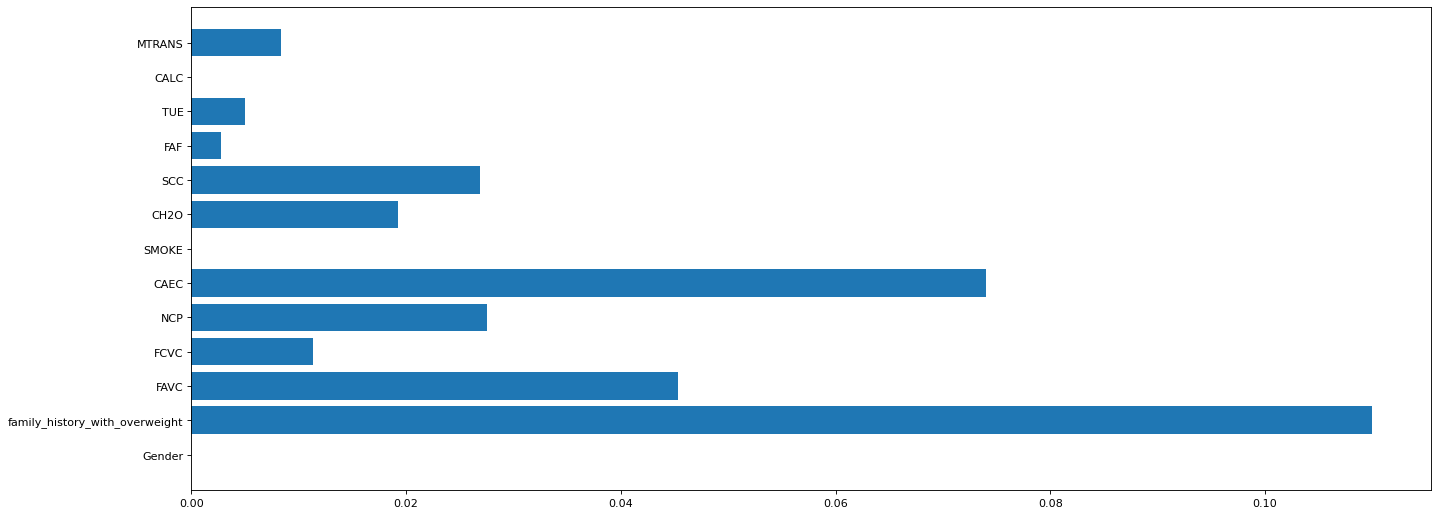

Student Dataset:
{'school': 0.07825589550126333, 'sex': 0.05803114372353502, 'address': 0.0, 'famsize': 0.0, 'Pstatus': 0.002765270689506494, 'Medu': 0.046106962790350536, 'Fedu': 0.019089187133300545, 'Mjob': 0.03450524320589299, 'Fjob': 0.03260559080106207, 'reason': 0.024131722241540476, 'guardian': 0.0003411695409831772, 'traveltime': 0.027235840979318304, 'studytime': 0.036971522396290535, 'failures': 0.10335924769227534, 'schoolsup': 0.0, 'famsup': 0.0, 'paid': 0.0, 'activities': 0.0, 'nursery': 0.0, 'higher': 0.04799476025337013, 'internet': 0.02125333887659364, 'romantic': 0.0, 'famrel': 0.0023983341563624805, 'freetime': 0.05011651100799863, 'goout': 0.040715788258633534, 'Dalc': 0.002081733632872673, 'Walc': 0.03248661867962488, 'health': 0.02781498381968106, 'absences': 0.0}


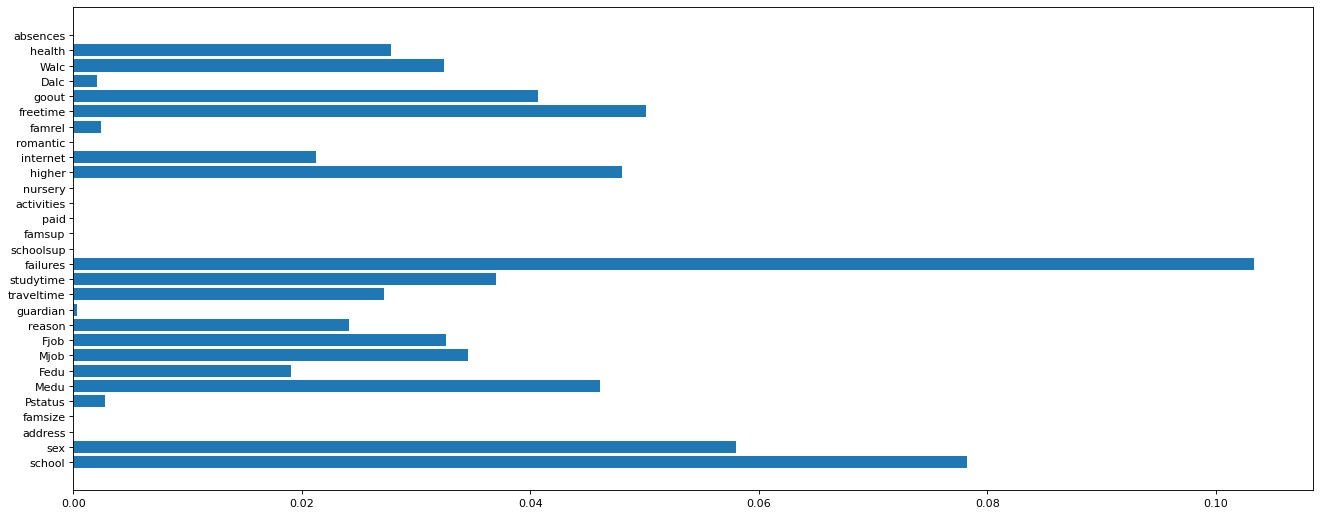

Bank-marketing Dataset:
{'job': 0.00733577466968538, 'marital': 0.001236824136397363, 'education': 0.0, 'default': 0.005347064707155846, 'housing': 0.001393940591623899, 'loan': 0.001725816819432291, 'contact': 0.008488630645776318, 'month': 0.010755363382099592, 'poutcome': 0.027677574408900396}


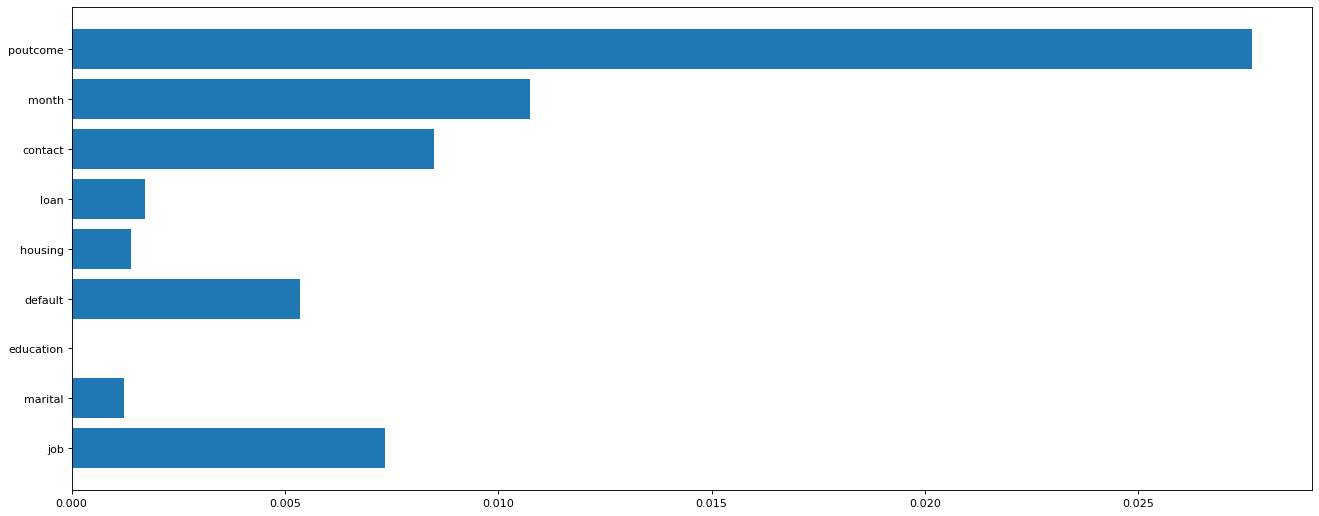

In [10]:
# Write additional code here, if necessary (you may insert additional code cells)

from sklearn.feature_selection import mutual_info_classif as MIC
import numpy as np
import matplotlib.pyplot as plt

# function to calculate the mutual information of every dataset and plot the result
def Mutual_Info_Plot(filename):
    df, df_labels = preprocess(filename)
    
    # drop label column to get feature vectors
    features_df = df.drop(['label'], axis=1)
    feature_list = features_df.columns.tolist()

    # convert categorical values to numbers
    for feature in feature_list:
        features_df[feature] = pd.factorize(features_df[feature])[0].astype(np.uint16)

    mi_score = MIC(features_df, df_labels, random_state = 0)

    dic_mi_score = {}
    for feature, mi in zip(feature_list, mi_score):
        dic_mi_score[feature] = mi

    print(dic_mi_score)
    
    plt.figure(figsize=(20,8),dpi=80)
    plt.barh(range(len(mi_score)), mi_score, tick_label=feature_list)
    plt.show()

print('Obesity Dataset:')
Mutual_Info_Plot('./obesity.csv')

print('Student Dataset:')
Mutual_Info_Plot('./student.csv')

print('Bank-marketing Dataset:')
Mutual_Info_Plot('./bank-marketing.csv')


Provide your text answer to **Question 3.a** of 100-150 words in this cell.

Yes, different features have different utility to the classification task. The reason why each feature has different mutual information value is that each attribute has a different correlation to the class label. As the plot result shown above, for obesity dataset, the attribute 'family_history_with_overweight' is the 'best' attribute for this classification task, whose value is 0.1099686394200814. Besides, some attributes are totally not correlated with the class labels and the values are 0, such as Gender, SMOKE and CALC. It is similar in student dataset and bank-marketing dataset. The 'best' attribute for student dataset is 'failures': 0.10335924769227534, and for bank-marketing dataset is 'poutcome': 0.027677574408900396.

Provide your text answer to **Question 3.b** of 100-150 words in this cell.

(1). The assumption of naive Bayes is the conditional independence assumption. It means that each feature makes an independent and equal (i.e. are identical) contribution to the outcome. The reason why we make 'naivety' assumption is that it makes computations much easier to compute and reason about. If A and B are independent then P(A|B) = P(A) and vice versa. It simplifies the equation and reason difficulty. (2). The assumption that all features are independent is not usually the case in real life so it makes naive bayes algorithm less accurate than complicated algorithms if the interactions within attributes are complex. For example, from part 1, we can find that NB works well on bank-marketing and obesity datasets while it performs worse on student dataset. Comparing the features in the datasets, the number of features for bank-marketing and obesity datasets are 13, 9, much smaller than student dataset 29. We can implies that the interactions between the features of student dataset are stronger than those of the other two datasets, for example, 'student.studytime' may interact with 'student.failures'. Besides, 'obesity.family_history_with_overweight' may should be given more weight when doing the classification, but NB treats all attributes equally.

## Question 4: Feature Selection and Ethics [4 marks]

In [11]:
# Write additional code here, if necessary (you may insert additional code cells)

df, ground_truth = preprocess("./student.csv")

# drop seleted columns
cleaned_df = df.drop(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'health'], axis=1)

feature_dic, prior_class_prob = train(cleaned_df)

instance_class_prop, prediction = predict(cleaned_df, feature_dic, prior_class_prob)

accuracy, precision_weighted, recall_weighted, f1_weighted = evaluate(ground_truth, prediction)


print('The performance of cleaned dataset:')
print('accuracy = ', accuracy)
print('precision_weighted = ', precision_weighted)
print('recall_weighted = ', recall_weighted)
print('f1_weighted = ', f1_weighted)
print('\n')

df, ground_truth = preprocess("./student.csv")

feature_dic, prior_class_prob = train(df)

instance_class_prop, prediction = predict(df, feature_dic, prior_class_prob)

accuracy, precision_weighted, recall_weighted, f1_weighted = evaluate(ground_truth, prediction)


print('The performance of full dataset:')
print('accuracy = ', accuracy)
print('precision_weighted = ', precision_weighted)
print('recall_weighted = ', recall_weighted)
print('f1_weighted = ', f1_weighted)

The performance of cleaned dataset:
accuracy =  0.4437596302003082
precision_weighted =  0.44096615530316996
recall_weighted =  0.4437596302003082
f1_weighted =  0.4407556239837583


The performance of full dataset:
accuracy =  0.48382126348228044
precision_weighted =  0.4857742081328605
recall_weighted =  0.48382126348228044
f1_weighted =  0.4834963990558278


Provide your text answer to **Question 4.a** of 100-150 words in this cell.

Intuitionally, there are some features that are not correlated with the predicted grade label, and it may cause ethical problems if we use this dataset to train our machine learning model and employ it to reality. For example, though 'sex' has large mutual information, it should not be included since it can cause sexism. Clearly, gender has nothing to do with academic performance. And other personal information like 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian' should not be included as well. It can create class discrimination and entrenchment, and poorer students may be given fewer opportunities to learn, which is clearly unethical. And 'health' should not be included, it may cause the discrimination against people with disabilities.


Provide your text answer to **Question 4.b** of 100-150 words in this cell.

Comparing to the full classifier, the performace of the cassifier on the cleaned dataset is slightly decreased. All the evaluation metrics decrease around 4%. However, we can say that the 4% accuracy drop can be ignored in this case. And, it is worth sacrificing 4% accuracy to get a more ethical model that guarantees fairness in how schools admit students and avoids potential discrimination issues. The pursuit of model accuracy is premised on ensuring relative fairness and following ethical code.

Provide your text answer to **Question 4.c** of 100-150 words in this cell.

No, I think it can not guarantee a fair classifier. And to be honest, in my opinion, there is no such an absolutely fair classifier exists. The reason is that though we have simply deleted any questionable features from our data, we can not guarantee the interactions between the deleted features and the retained features are removed at the same time. It is likely that the retained features have a strong correlation with the deleted features. If so, the trained classifier on cleaned dataset is still ethically biased. For example, deleted attributes 'Mjob' 'Fjob' with the retained attribute 'famsup'. Here, I think whether the classifier is fair totally depends on the fairness of the data. But absolutely fair training data arguably does not exist, which means that absolutely fair classifiers do not exist. As developers, we can only reduce the ethical bias of data and models as much as possible to maximize relative fairness and minimize the potential harm.


<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: [Yixin SHEN 1336242]
   
   <b>Dated</b>: [31/08/2022]